In [155]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [156]:
lr1 = pd.read_csv('data/lr_features.csv')

In [160]:
lr1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_diff', 'sqft_diff_ratio',
       'sqft_living_squared', 'sqft_lot_squared', 'sqft_diff_squared'],
      dtype='object')

In [161]:
lr2 = pd.read_csv('data/Han_Chosen_Features_df.csv')

In [162]:
lr1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_diff', 'sqft_diff_ratio',
       'sqft_living_squared', 'sqft_lot_squared', 'sqft_diff_squared'],
      dtype='object')

In [163]:
lr2.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'condition', 'floors',
       'sqft_lot', 'sqft_above', 'sqft_basement', 'BR/BTH', 'FAR', 'yard',
       'lot_per_floor', 'living_per_floor', 'living_per_lot', 'grade',
       'yr_built', 'yr_renovated', 'yr_built_pd', 'renovated',
       'built_and_renovated', 'zipcode', 'view', 'waterfront'],
      dtype='object')

In [164]:
lr2['id'] = lr2.index + 1

In [165]:
lr1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_diff,sqft_diff_ratio,sqft_living_squared,sqft_lot_squared,sqft_diff_squared
0,221900.0,3,1.00,1180,5650,1.0,0,0,2,7,...,98178,47.5112,-122.257,1340,5650,4470,0.791150,1392400,31922500,30530100
1,538000.0,3,2.25,2570,7242,2.0,0,0,2,7,...,98125,47.7210,-122.319,1690,7639,4672,0.645126,6604900,52446564,45841664
2,180000.0,2,1.00,770,10000,1.0,0,0,2,6,...,98028,47.7379,-122.233,2720,8062,9230,0.923000,592900,100000000,99407100
3,604000.0,4,3.00,1960,5000,1.0,0,0,4,7,...,98136,47.5208,-122.393,1360,5000,3040,0.608000,3841600,25000000,21158400
4,510000.0,3,2.00,1680,8080,1.0,0,0,2,8,...,98074,47.6168,-122.045,1800,7503,6400,0.792079,2822400,65286400,62464000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,2,8,...,98103,47.6993,-122.346,1530,1509,-399,-0.352785,2340900,1279161,-1061739
21593,400000.0,4,2.50,2310,5813,2.0,0,0,2,8,...,98146,47.5107,-122.362,1830,7200,3503,0.602615,5336100,33790969,28454869
21594,402101.0,2,0.75,1020,1350,2.0,0,0,2,7,...,98144,47.5944,-122.299,1020,2007,330,0.244444,1040400,1822500,782100
21595,400000.0,3,2.50,1600,2388,2.0,0,0,2,8,...,98027,47.5345,-122.069,1410,1287,788,0.329983,2560000,5702544,3142544


In [166]:
lr2.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'condition', 'floors',
       'sqft_lot', 'sqft_above', 'sqft_basement', 'BR/BTH', 'FAR', 'yard',
       'lot_per_floor', 'living_per_floor', 'living_per_lot', 'grade',
       'yr_built', 'yr_renovated', 'yr_built_pd', 'renovated',
       'built_and_renovated', 'zipcode', 'view', 'waterfront', 'id'],
      dtype='object')

In [167]:
column_selectors = ['BR/BTH','FAR','yard','lot_per_floor','living_per_floor','living_per_lot','yr_built_pd','renovated','built_and_renovated']

In [168]:
df1 = lr2[column_selectors]

In [169]:
df1

,BR/BTH,FAR,yard,lot_per_floor,living_per_floor,living_per_lot,yr_built_pd,renovated,built_and_renovated
0,3.00,0.21,4470.0,5650.0,1180.0,0.21,6,0,60
1,1.33,0.35,6157.0,3621.0,1085.0,0.30,6,1,18
2,2.00,0.08,9230.0,10000.0,770.0,0.08,4,0,40
3,1.33,0.39,3950.0,5000.0,1050.0,0.21,7,0,70
4,1.50,0.21,6400.0,8080.0,1680.0,0.21,9,0,90
...,...,...,...,...,...,...,...,...,...
21592,1.20,1.35,621.0,377.0,510.0,1.35,11,0,110
21593,1.60,0.40,4658.0,2906.5,1155.0,0.40,12,0,120
21594,2.67,0.76,840.0,675.0,510.0,0.76,11,0,110
21595,1.20,0.67,1588.0,1194.0,800.0,0.67,11,0,110


In [170]:
result = pd.concat([lr1, df1], axis=1)

In [171]:
result

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_diff_squared,BR/BTH,FAR,yard,lot_per_floor,living_per_floor,living_per_lot,yr_built_pd,renovated,built_and_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,2,7,...,30530100,3.00,0.21,4470.0,5650.0,1180.0,0.21,6,0,60
1,538000.0,3,2.25,2570,7242,2.0,0,0,2,7,...,45841664,1.33,0.35,6157.0,3621.0,1085.0,0.30,6,1,18
2,180000.0,2,1.00,770,10000,1.0,0,0,2,6,...,99407100,2.00,0.08,9230.0,10000.0,770.0,0.08,4,0,40
3,604000.0,4,3.00,1960,5000,1.0,0,0,4,7,...,21158400,1.33,0.39,3950.0,5000.0,1050.0,0.21,7,0,70
4,510000.0,3,2.00,1680,8080,1.0,0,0,2,8,...,62464000,1.50,0.21,6400.0,8080.0,1680.0,0.21,9,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,2,8,...,-1061739,1.20,1.35,621.0,377.0,510.0,1.35,11,0,110
21593,400000.0,4,2.50,2310,5813,2.0,0,0,2,8,...,28454869,1.60,0.40,4658.0,2906.5,1155.0,0.40,12,0,120
21594,402101.0,2,0.75,1020,1350,2.0,0,0,2,7,...,782100,2.67,0.76,840.0,675.0,510.0,0.76,11,0,110
21595,400000.0,3,2.50,1600,2388,2.0,0,0,2,8,...,3142544,1.20,0.67,1588.0,1194.0,800.0,0.67,11,0,110


In [172]:
result.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_diff', 'sqft_diff_ratio',
       'sqft_living_squared', 'sqft_lot_squared', 'sqft_diff_squared',
       'BR/BTH', 'FAR', 'yard', 'lot_per_floor', 'living_per_floor',
       'living_per_lot', 'yr_built_pd', 'renovated', 'built_and_renovated'],
      dtype='object')

In [173]:
heat_mp = result.corr()

<AxesSubplot:>

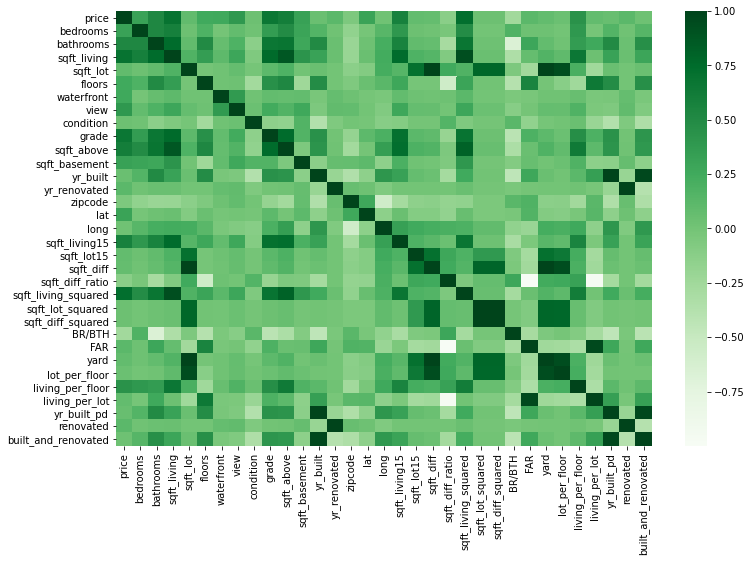

In [174]:
plt.figure(figsize=(12,8))
sns.heatmap(heat_mp, cmap="Greens")

In [175]:
df_dummies = pd.get_dummies(result, columns=['zipcode'])
df_dummies.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,2,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,2,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,2,8,...,0,0,0,0,0,0,0,0,0,0


In [176]:
df_dummies.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=102)

In [177]:
df_dummies.drop('price', axis = 1, inplace=True)

In [178]:
df_dummies.drop('sqft_living15', axis = 1, inplace=True)
df_dummies.drop('sqft_above', axis = 1, inplace=True)

In [179]:
df_dummies.drop('lot_per_floor', axis = 1, inplace=True)

In [180]:
df_dummies.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_lot15', 'sqft_diff',
       'sqft_diff_ratio', 'sqft_living_squared', 'sqft_lot_squared',
       'sqft_diff_squared', 'BR/BTH', 'FAR', 'yard', 'living_per_floor',
       'living_per_lot', 'yr_built_pd', 'renovated', 'built_and_renovated',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'z

In [181]:
y1 = lr['price']
x1 = df_dummies

In [182]:
import statsmodels.api as sm
X_aug = sm.add_constant(x1)
res = sm.OLS(y1, X_aug).fit()

In [183]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:43:37   Log-Likelihood:            -2.8814e+05
No. Observations:               21597   AIC:                         5.765e+05
Df Residuals:                   21502   BIC:                         5.772e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.222e+07   5.77e+06     -5.585      0.000   -4.35e+07   -2.09e+07
bedrooms            -3.482e+04   2717.975    -12.812      0.000   -4.02e+04   -2.95e+04
bathrooms            6.763e+04   4456.884     15.175      0.000    5.89e+04    7.64e+04
sqft_living           -19.0694      9.718     -1.962      0.050     -38.117      -0.021
sqft_lot              -55.0818     12.516     -4.401      0.000     -79.613     -30.550
floors              -1.321e+04   6910.526     -1.911      0.056   -2.68e+04     338.737
waterfront           6.459e+05   1.38e+04     46.642      0.000    6.19e+05    6.73e+05
view                 5.541e+04   1618.792     34.227      0.000    5.22e+04    5.86e+04
condition            3.114e+04   1816.777     17.138      0.000    2.76e+04    3.47e+04
grade                6.643e+04   1682.850     39.474      0.000    6.31e+04    6.97e+04
sqft_basement         -59.5270      5.596    -10.637      0.000     -70.496     -48.558
yr_built            -1009.6509    375.916     -2.686      0.007   -1746.474    -272.828
yr_renovated         2632.0533    420.426      6.260      0.000    1807.987    3456.119
lat                  2.315e+05   5.96e+04      3.882      0.000    1.15e+05    3.48e+05
long                -1.897e+05   4.29e+04     -4.420      0.000   -2.74e+05   -1.06e+05
sqft_lot15             -0.2252      0.061     -3.690      0.000      -0.345      -0.106
sqft_diff             -39.9371      9.608     -4.156      0.000     -58.770     -21.104
sqft_diff_ratio      1.501e+05   3.66e+05      0.410      0.682   -5.67e+05    8.68e+05
sqft_living_squared -1.562e+06   9.09e+06     -0.172      0.864   -1.94e+07    1.63e+07
sqft_lot_squared     1.562e+06   9.09e+06      0.172      0.864   -1.63e+07    1.94e+07
sqft_diff_squared   -1.562e+06   9.09e+06     -0.172      0.864   -1.94e+07    1.63e+07
BR/BTH               4.271e+04   4060.604     10.517      0.000    3.47e+04    5.07e+04
FAR                  1.432e+05   3.66e+05      0.391      0.696   -5.75e+05    8.61e+05
yard                   95.1735     15.747      6.044      0.000      64.308     126.039
living_per_floor       95.4160     16.000      5.963      0.000      64.055     126.777
living_per_lot      -8.563e+04   2.82e+04     -3.036      0.002   -1.41e+05   -3.04e+04
yr_built_pd          6140.7933   5084.490      1.208      0.227   -3825.184    1.61e+04
renovated           -5.203e+06   8.33e+05     -6.245      0.000   -6.84e+06   -3.57e+06
built_and_renovated    21.9100    354.797      0.062      0.951    -673.519     717.339
zipcode_98001       -6.228e+05   8.12e+04     -7.669      0.000   -7.82e+05   -4.64e+05
zipcode_98002       -5.927e+05   7.92e+04     -7.485      0.000   -7.48e+05   -4.38e+05
zipcode_98003       -6.493e+05   8.29e+04     -7.830      0.000   -8.12e+05   -4.87e+05
zip

In [184]:
lr_model1 = LinearRegression()
lr_model1

LinearRegression()

Training the Model

In [185]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3)

In [186]:
print(len(X_train1))
print(len(X_test1))

15117
6480


In [187]:
lr_model1.fit(X_train1, y_train1)

LinearRegression()

In [188]:
lr_model1.coef_

array([-1.90273240e+04,  4.48532228e+04, -2.57108486e+01, -8.14732630e+01,
       -2.00939892e+03,  6.28134343e+05,  5.64859359e+04,  3.32511088e+04,
        6.59175254e+04, -5.17553136e+01, -1.15215667e+03,  2.33130804e+03,
        2.08679912e+05, -1.65227373e+05, -2.49345950e-01,  4.28565758e+00,
       -7.13534692e+04, -1.64946040e+07,  1.64946040e+07, -1.64946040e+07,
        2.12924287e+04, -6.55903454e+04,  7.74785165e+01,  8.13306396e+01,
       -9.54200799e+04,  1.37539733e+04, -4.62200773e+06, -6.48840814e+02,
       -1.57854675e+05, -1.31798465e+05, -1.91922823e+05,  5.46398474e+05,
        1.14215772e+05,  6.29597494e+04,  5.00119089e+04,  5.76360863e+04,
       -5.93487412e+04, -1.01955409e+05, -6.40248533e+04, -9.62570672e+04,
       -1.03784194e+05, -2.02962430e+05,  2.58856307e+04,  9.96457395e+03,
       -1.15277823e+05,  5.62440417e+04, -1.47323661e+05, -1.57480435e+05,
       -1.81777724e+05,  1.38251916e+05, -2.52763042e+04, -8.52651296e+04,
        9.99092745e+05,  

In [189]:
lr_model1.intercept_

-28042906.699576646

In [190]:
lr_model1.score(X_train1, y_train1)

0.836463856804356

In [191]:
lr_model1.score(X_test1, y_test1)

0.8174281639315006

In [192]:
# This gets the predictions of model on test set.
y_pred1 = lr_model1.predict(X_test1)
#get first ten elements of prediction.
y_pred1[0:10]

array([1489589.87949605,  483473.16354109,  220751.65172353,
        539844.66881717,  488004.35641881,  517629.47278928,
        167734.66659736,  642914.21448732,  796623.40569953,
        568306.91233891])

/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


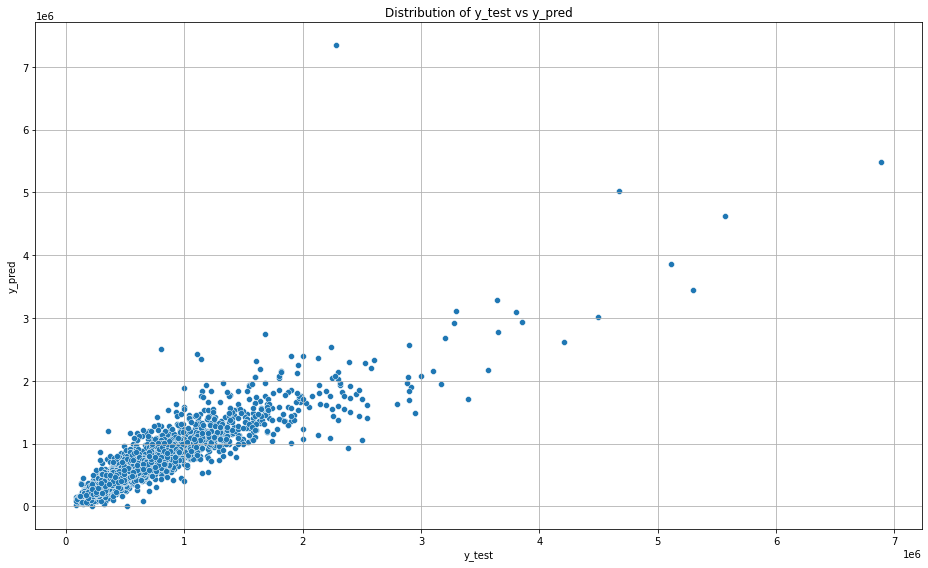

In [193]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.scatterplot(y_test1, y_pred1)
plt.rcParams.update({'font.size':10})
ax.set_xlabel('y_test')
ax.set_ylabel("y_pred")
ax.set_title('Distribution of y_test vs y_pred')
plt.grid()
plt.tight_layout()
plt.show();

In [1]:
plt.plot(X_test1, y_test1)

NameError: name 'plt' is not defined